In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import minimize
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [3]:
# Define a function that computes the probability density function of the normal distribution.

# this function takes (1) value of data (x), and (2) mean and (3) standard deviation of normal distribution (mu, sigma) 
# and returns its probability density.

In [1]:
def normal_dist(
    x, mu: float = 0.0, sigma: float = 1.0
):
    return (
        (1 / (np.sqrt(2 * np.pi) * sigma))
        * np.exp((-1/2) * ((x - mu) / sigma) ** 2)
    )

In [5]:
# Define a function that computes likelihood of dataset.

# this function takes (1) a dataset, (2) function of distribution, and (3) parameters for the distribution, 
# and returns its overall likelihood.

In [3]:
def likelihood(data, distribution, *args, **kwargs):
    return np.prod(
        [distribution(x, *args, **kwargs) for x in data]
    )

In [4]:
dataset = [2.61, 3.73, 2.80, 4.29, 3.12]

In [ ]:
# calculate likeliihood for the dataset using normal distribution function.

In [8]:
likelihood(dataset, normal_dist, mu=1, sigma=1)

6.214114089790265e-09

In [9]:
likelihood(dataset, normal_dist, mu=3, sigma=1)

0.0030383439477580008

In [10]:
likelihood(dataset, stats.norm.pdf, loc=3, scale=1)

0.0030383439477580016

In [5]:
# now define Bernoulli distribution and calculate likelihood for the given datasets.

In [11]:
def bernoulli(x, p):
    return p ** x * (1-p) ** (1-x)

In [12]:
dataset2 = [1, 0, 1, 1, 1, 0, 1, 0]

In [13]:
likelihood(dataset2, bernoulli, 0.5)

0.00390625

In [14]:
likelihood(dataset2, bernoulli, 0.2)

0.00016384000000000008

In [15]:
likelihood(dataset2, stats.bernoulli.pmf, 0.2)

0.00016383999999999981

In [6]:
# define Logistic function and calculate likelihood for the given datasets.

In [16]:
def logistic(data, beta):
    x = data[:-1]
    y = data[-1]

    p = 1 / (1 + np.exp(-np.dot(x, beta)))

    return p ** y * (1 - p) ** (1 - y)

In [17]:
x = [[1, 150], [1, 160], [1, 167], [1, 170]]
y = [1, 0, 1, 0]

In [18]:
dataset3 = np.c_[x, y]

In [19]:
likelihood(dataset3, logistic, [0.2, 1])

0.0

In [7]:
# Define log-likelihood function.

In [20]:
def log_likelihood(x, data, sigma):
    return sum(
        [-np.log(normal_dist(d, x, sigma)) for d in data]
    )

In [21]:
dataset4 = [2.61, 3.37, 2.80, 4.29, 3.12]

In [ ]:
# use 

In [22]:
minimizer = minimize(
    log_likelihood, 
    0, 
    (dataset4, 1), 
    method="Nelder-Mead", 
    options={"xatol": 1e-8, "disp": True}
)

Optimization terminated successfully.
         Current function value: 5.456833
         Iterations: 41
         Function evaluations: 83


In [24]:
minimizer.x

array([3.238])

In [22]:
np.mean(dataset4)

3.2380000000000004

In [ ]:
# load height dataset.

In [8]:
height = pd.read_csv("height.csv")

NameError: name 'pd' is not defined

In [9]:
height

NameError: name 'height' is not defined

In [30]:
# plot histogram of height as a whole (use 15 bins).

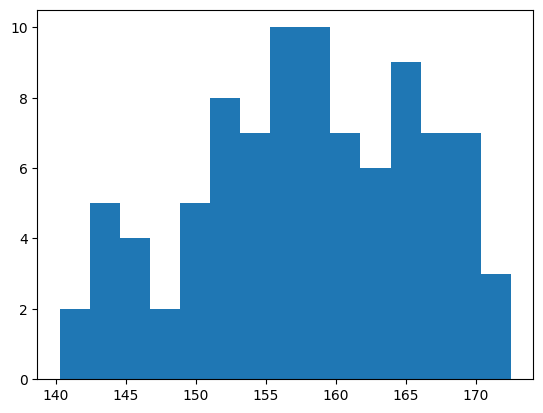

In [33]:
plt.figure()
plt.hist(height["height"], bins=15)
plt.show()

In [34]:
# plot histogram for male and female separately.

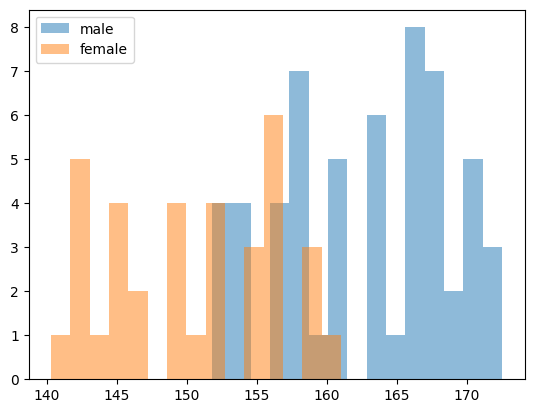

In [35]:
plt.figure()
for c in height["sex"].unique():
    height_c = height[height["sex"] == c]["height"]
    plt.hist(height_c, bins=15, label=c, alpha=0.5)
plt.legend()
plt.show()

In [36]:
# declare logistic regression model and train it.

In [37]:
log_reg = LogisticRegression()
log_reg.fit(height["height"], height["sex"])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [39]:
log_reg.fit(height[["height"]], height["sex"])

LogisticRegression()

In [54]:
# print the coefficient and intercept of the trained logistic regression model.

In [40]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[0.34184386]]
[-53.03336339]


In [55]:
# make predictions and calculate predicted probabilities.

In [41]:
y_pred = log_reg.predict(height[["height"]])

In [42]:
y_prob = log_reg.predict_proba(height[["height"]])

In [57]:
# calculate accuracy.

In [43]:
log_reg.score(height[["height"]], height["sex"])

0.8043478260869565

In [58]:
# apply logistic regression to multi-class dataset (Iris dataset)

In [61]:
# load iris dataset and get data x and target y.

In [62]:
iris = load_iris()
x = iris.data
y = iris.target

In [63]:
# declare logistic regression for multinomial logistic regression (with max_iter = 300)
# and fit it to the data.

In [64]:
log_reg2 = LogisticRegression(multi_class="multinomial", max_iter=300)
log_reg2.fit(x, y)

LogisticRegression(max_iter=300, multi_class='multinomial')

In [65]:
# display the coefficients and intercepts.

In [66]:
print(log_reg2.coef_)

[[-0.42297784  0.96737285 -2.51559259 -1.08055747]
 [ 0.53460191 -0.32246744 -0.20680669 -0.94445271]
 [-0.11162407 -0.64490541  2.72239928  2.02501018]]


In [67]:
print(log_reg2.intercept_)

[  9.84293639   2.23994242 -12.08287881]


In [68]:
# calculate the accuracy

In [69]:
print(log_reg2.score(x, y))

0.9733333333333334


In [70]:
# declare one-versus-rest (ovr) logistic regression model (with max_iter = 100)
# and fit it to the data.

In [71]:
log_reg3 = LogisticRegression(multi_class="ovr", max_iter=100)
log_reg3.fit(x, y)

LogisticRegression(multi_class='ovr')

In [72]:
# display the coefficients and intercepts.

In [73]:
print(log_reg3.coef_)

[[-0.44565052  0.90054581 -2.32023343 -0.98112874]
 [-0.17917535 -2.12878487  0.69671839 -1.27500517]
 [-0.39270716 -0.51442952  2.93064063  2.41608802]]


In [74]:
print(log_reg3.intercept_)

[  6.68931554   5.58592907 -14.43598319]


In [75]:
# calculate the accuracy.

In [76]:
print(log_reg3.score(x, y))

0.9533333333333334
